# 

Ryan Cooper 4/29/25

1. Did your exploratory analysis from last week highlight anything that needs to be cleaned?
There was 2 thingsw I wanted to clean, the restaurant column and the salad column.

2. Investigate any NaN's that you find. Should these be replaced with another value? If so, what would be the best value? Should that record be deleted instead?
There were a couple NaN's under the vitamin a, b, and c columns. This data is fairly insignificant in regards to the questions I will be looking into, so I left the columns in and did not change the NaN's. One thing I noticed is that there is a salad category for all these restaurants. Half the restaurants do not have a salad option, and if the restaurant does it is only 1. The category also says "other" if something is not a salad. This column doesn't give any real information that can't be seen looking at the food item, so it was removed.

3. Are there outliers to any of the data items? What could explain those outliers? Should those records be changed or deleted?
At first when looking at the dataset, the calories column has a couple of extremely high items. But after looking into it the actual food that has these extreme amount of calories, is typically a party or family portion. An example of this is the Mcdonalds 20 piece Buttermilk Crispy Chicken Tenders, which has 2430 calories. 

4. Are the column names not in a format that makes it easy to refer to?
All columns are easy to refer to for this study.

5. Do you need to split up a column's data into multiple columns or simplify its values?
I had to split up my dataset into 8 different ones. This being all the 8 different restaurants in the original dataset (Mcdonalds, Chick Fil-A, Sonic, Arbys, Burger King, Dairy Queen, Subway, and Taco Bell).

In [13]:
import pandas as pd

filepath= "https://docs.google.com/spreadsheets/d/1l9u33E8ZV_TFQgIGAvq-Et7d0EcPQsfY7y27IDshEH0/export?format=csv&gid=304620187"
df = pd.read_csv(filepath)

# Remove the 'salad' column
df = df.drop(columns=['salad'])

print(df)

    restaurant                                       item  calories  cal_fat  \
0    Mcdonalds           Artisan Grilled Chicken Sandwich       380       60   
1    Mcdonalds             Single Bacon Smokehouse Burger       840      410   
2    Mcdonalds             Double Bacon Smokehouse Burger      1130      600   
3    Mcdonalds  Grilled Bacon Smokehouse Chicken Sandwich       750      280   
4    Mcdonalds   Crispy Bacon Smokehouse Chicken Sandwich       920      410   
..         ...                                        ...       ...      ...   
510  Taco Bell             Spicy Triple Double Crunchwrap       780      340   
511  Taco Bell                Express Taco Salad w/ Chips       580      260   
512  Taco Bell                     Fiesta Taco Salad-Beef       780      380   
513  Taco Bell                  Fiesta Taco Salad-Chicken       720      320   
514  Taco Bell                    Fiesta Taco Salad-Steak       720      320   

     total_fat  sat_fat  trans_fat  cho

In [14]:
import pandas as pd

filepath= "https://docs.google.com/spreadsheets/d/1l9u33E8ZV_TFQgIGAvq-Et7d0EcPQsfY7y27IDshEH0/export?format=csv&gid=304620187"
df = pd.read_csv(filepath)


mcdonalds_df = df[df['restaurant'] == 'McDonalds'].copy()
chick_fil_a_df = df[df['restaurant'] == 'Chick fil-A'].copy()
sonic_df = df[df['restaurant'] == 'Sonic'].copy()
arbys_df = df[df['restaurant'] == 'Arbys'].copy()
burger_king_df = df[df['restaurant'] == 'Burger King'].copy()
dairy_queen_df = df[df['restaurant'] == 'Dairy Queen'].copy()
subway_df = df[df['restaurant'] == 'Subway'].copy()
taco_bell_df = df[df['restaurant'] == 'Taco Bell'].copy()


if 'salad' in mcdonalds_df.columns:
    mcdonalds_df.drop(columns=['salad'], inplace=True)
if 'salad' in chick_fil_a_df.columns:
    chick_fil_a_df.drop(columns=['salad'], inplace=True)
if 'salad' in sonic_df.columns:
    sonic_df.drop(columns=['salad'], inplace=True)
if 'salad' in arbys_df.columns:
    arbys_df.drop(columns=['salad'], inplace=True)
if 'salad' in burger_king_df.columns:
    burger_king_df.drop(columns=['salad'], inplace=True)
if 'salad' in dairy_queen_df.columns:
    dairy_queen_df.drop(columns=['salad'], inplace=True)
if 'salad' in subway_df.columns:
    subway_df.drop(columns=['salad'], inplace=True)
if 'salad' in taco_bell_df.columns:
    taco_bell_df.drop(columns=['salad'], inplace=True)


print("McDonald's DataFrame (using 'restaurant' column) after removing 'salad' column:")
print(mcdonalds_df.head())

McDonald's DataFrame (using 'restaurant' column) after removing 'salad' column:
Empty DataFrame
Columns: [restaurant, item, calories, cal_fat, total_fat, sat_fat, trans_fat, cholesterol, sodium, total_carb, fiber, sugar, protein, vit_a, vit_c, calcium]
Index: []


In [15]:
print(taco_bell_df)


    restaurant                            item  calories  cal_fat  total_fat  \
400  Taco Bell  1/2 lb.* Cheesy Potato Burrito       540      230         26   
401  Taco Bell          1/2 lb.* Combo Burrito       460      170         18   
402  Taco Bell                 7-Layer Burrito       510      170         19   
403  Taco Bell                    Bean Burrito       370      100         11   
404  Taco Bell           Beefy 5-Layer Burrito       550      200         22   
..         ...                             ...       ...      ...        ...   
510  Taco Bell  Spicy Triple Double Crunchwrap       780      340         38   
511  Taco Bell     Express Taco Salad w/ Chips       580      260         29   
512  Taco Bell          Fiesta Taco Salad-Beef       780      380         42   
513  Taco Bell       Fiesta Taco Salad-Chicken       720      320         35   
514  Taco Bell         Fiesta Taco Salad-Steak       720      320         36   

     sat_fat  trans_fat  cholesterol  s

# 1. Which restaurant’s foods have the highest average calories across their menu?

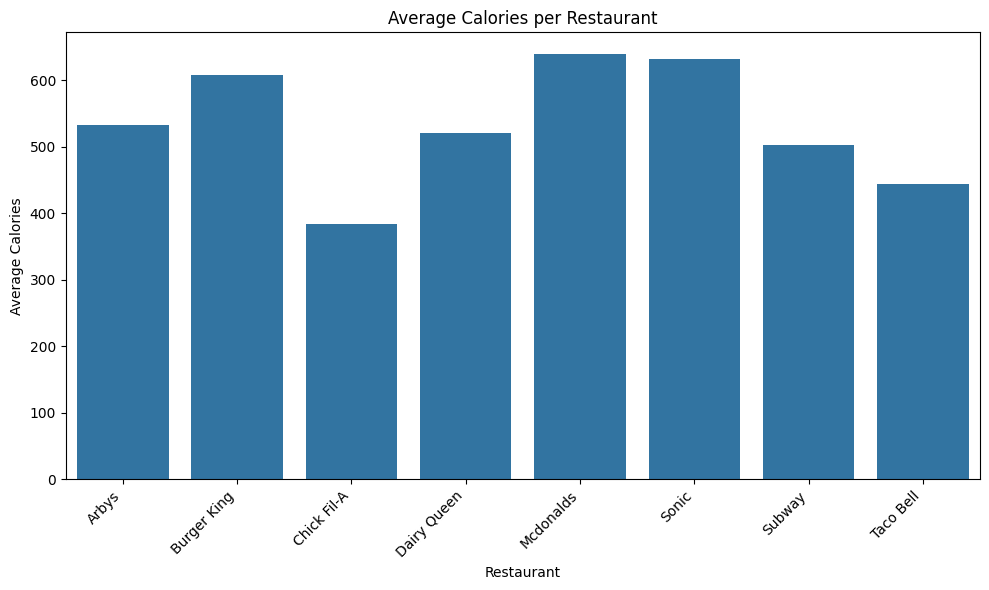

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
average_calories = df.groupby('restaurant')['calories'].mean().reset_index()
plt.figure(figsize=(10, 6))  
sns.barplot(x='restaurant', y='calories', data=average_calories)
plt.title('Average Calories per Restaurant')
plt.xlabel('Restaurant')
plt.ylabel('Average Calories')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()  
plt.show()

This shows that Mcdonalds is the #1 Restaurant with the highest average caloric intake per menu item. Mcdonalds is followed shortly by Sonic and then Burger King.

# 2. What food across all restaurants has the highest amount of protein with the least amount of calories? 

In [27]:
highest_protein_food = df.loc[df['protein'].idxmax()]
lowest_calories_food = df.loc[df['calories'].idxmin()]

df['protein_calorie_ratio'] = df['protein'] / df['calories']

highest_protein_calorie_ratio_food = df.loc[df['protein_calorie_ratio'].idxmax()]
print(f"Food with highest protein-to-calorie ratio: {highest_protein_calorie_ratio_food['item']}, Protein: {highest_protein_calorie_ratio_food['protein']}, Calories: {highest_protein_calorie_ratio_food['calories']}, Restaurant: {highest_protein_calorie_ratio_food['restaurant']}, Protein-to-Calorie Ratio: {highest_protein_calorie_ratio_food['protein_calorie_ratio']:.2f}")


Food with highest protein-to-calorie ratio: Ultimate Chicken Club, Protein: 39.0, Calories: 100, Restaurant: Sonic, Protein-to-Calorie Ratio: 0.39


This calculation shows that the Ultimate Chicken Club from Sonic has the highest protein per calorie ratio out of all the food items in all of the restaurants, at .39 grams of protein per calorie.

# 3. Which chicken items have the least amount of total fat per calorie across all restaurants? 

Question 3 was changed from "Which chicken items have the least amount of total fat across all restaurants?" to "Which chicken items have the least amount of total fat per calorie across all restaurants?". This gives a better understanding, instead of simply looking at the smallest food that has the least amount of calories, with low fat, it takes into consideration the calories consumed and the total fat associated with that.

In [31]:
chicken_items = df[df['item'].str.contains('chicken', case=False, na=False)]

chicken_items['fat_per_calorie_ratio'] = chicken_items['total_fat'] / chicken_items['calories']

least_fat_per_calorie_chicken_item = chicken_items.loc[chicken_items['fat_per_calorie_ratio'].idxmin()]

print(f"Chicken item with the least amount of total fat per calorie: {least_fat_per_calorie_chicken_item['item']}, Total Fat: {least_fat_per_calorie_chicken_item['total_fat']}, Calories: {least_fat_per_calorie_chicken_item['calories']}, Restaurant: {least_fat_per_calorie_chicken_item['restaurant']}, Fat-per-Calorie Ratio: {least_fat_per_calorie_chicken_item['fat_per_calorie_ratio']:.2f}")

Chicken item with the least amount of total fat per calorie: 6" Sweet Onion Chicken Teriyaki, Total Fat: 5, Calories: 380, Restaurant: Subway, Fat-per-Calorie Ratio: 0.01


C:\Users\Ryan\AppData\Local\Temp\ipykernel_28064\347518121.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chicken_items['fat_per_calorie_ratio'] = chicken_items['total_fat'] / chicken_items['calories']


After only looking at chicken items across the restaurants, we can see that the '6" Sweet Onion Chicken Teriyaki' from Subway has the lowest amount of total fat per calorie ratio, that of 0.01 grams of total fat per calorie.

# 4. What is the average nuetritional value of each restaurant?

In [36]:
nutritional_columns = ['calories', 'cal_fat', 'total_fat', 'sat_fat', 'trans_fat', 'cholesterol', 'sodium', 'total_carb', 'fiber', 'sugar', 'protein', 'vit_a', 'vit_c', 'calcium']

# Group by restaurant and calculate the mean for each nutritional column
average_nutrition_per_restaurant = df.groupby('restaurant')[nutritional_columns].mean()

# Format the output to 2 decimal places
formatted_average_nutrition = average_nutrition_per_restaurant.apply(lambda x: x.map(lambda y: f"{y:.2f}"))

# Print the result
print("Average Nutritional Values per Restaurant:")
print(formatted_average_nutrition)


Average Nutritional Values per Restaurant:
            calories cal_fat total_fat sat_fat trans_fat cholesterol   sodium  \
restaurant                                                                      
Arbys         532.73  237.84     26.98    7.97      0.42       70.45  1515.27   
Burger King   608.57  333.76     36.81   11.15      0.86      100.86  1223.57   
Chick Fil-A   384.44  145.37     16.15    4.11      0.04       79.07  1151.48   
Dairy Queen   520.24  260.48     28.86   10.44      0.68       71.55  1181.79   
Mcdonalds     640.35  285.61     31.81    8.29      0.46      109.74  1437.89   
Sonic         631.70  338.30     37.64   11.42      0.93       86.98  1350.75   
Subway        503.02  165.10     18.48    6.20      0.22       61.30  1272.97   
Taco Bell     443.65  188.00     20.90    6.59      0.26       39.04  1013.91   

            total_carb fiber  sugar protein  vit_a  vit_c calcium  
restaurant                                                         
Arbys     

This chart shows the average nutritional value from each item on the menu of each restaurant.

# 5. Which restaurant has the healthiest burger? (Healthy being low fat, chroesterol, and sodium with high amounts of protein) 

In [40]:
burger_items = df[df['item'].str.contains('burger', case=False, na=False)]

# Calculate a health score (lower is healthier)
burger_items['health_score'] = (
    burger_items['total_fat'] +
    burger_items['cholesterol'] +
    burger_items['sodium'] -
    burger_items['protein'])

# Find the burger with the lowest health score
healthiest_burger = burger_items.loc[burger_items['health_score'].idxmin()]
print(f"\nHealthiest Burger: {healthiest_burger['item']} from {healthiest_burger['restaurant']}")
print(f"  Total Fat: {healthiest_burger['total_fat']:.2f}")
print(f"  Cholesterol: {healthiest_burger['cholesterol']:.2f}")
print(f"  Sodium: {healthiest_burger['sodium']:.2f}")
print(f"  Protein: {healthiest_burger['protein']:.2f}")


Healthiest Burger: Rodeo Burger from Burger King
  Total Fat: 13.00
  Cholesterol: 25.00
  Sodium: 450.00
  Protein: 9.00


C:\Users\Ryan\AppData\Local\Temp\ipykernel_28064\1873200444.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  burger_items['health_score'] = (


After creating a new variable named "health_score" we can see that the Rodeo Burger from Burger King is the "healthiest" burger across all restaurants. This burger has the lowest total fat, cholesterol, and sodium per protein across all burgers from these restaurants.